In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm  # one way to do regs
from sklearn.linear_model import LinearRegression

diamonds = sns.load_dataset('diamonds')

# remember the relationship between the quality of diamonds and their price:
# low quality diamonds (poor cuts, bad colours, and inferior clarity) have higher prices
sns.catplot(data=diamonds,
                y='price',x='cut',kind='box')

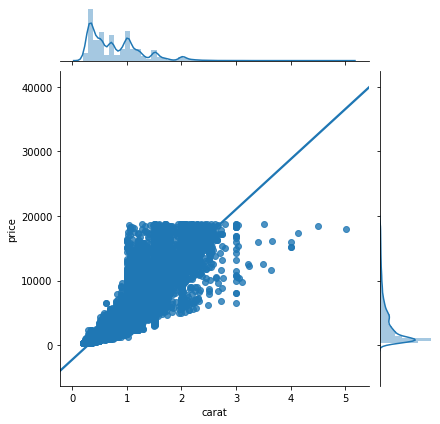

In [2]:
#maybe "ideal" diamnods are smaller, and price is related to size

sns.jointplot(data=diamonds, y='price',x='carat',kind='reg')

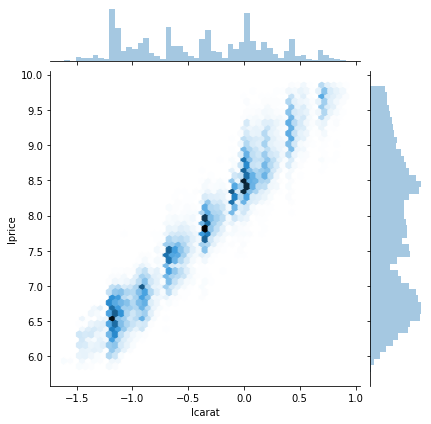

In [3]:


# throw away outliers, deal with remaining outliers/skew via:
# log transformation

#price is skewed: median <<< mean

diamonds2 = (diamonds
             .query('carat<2.5')
             .assign(lprice=np.log(diamonds['price']))#create a new function
             .assign(lcarat=np.log(diamonds['carat']))
             .assign(ideal = diamonds['cut'] == 'Ideal')
             .assign(const = 1)
            )

diamonds2.describe()
#shows the linear relationship between lprice & lcarat
sns.jointplot(data=diamonds2,x='lcarat',y='lprice',kind='hex')

### Method 1 - statsmodels.api

# Regression


In [4]:
import statsmodels.api as sm  

y = diamonds2['lprice']
X = diamonds2[['const','lcarat']]

model1 = sm.OLS(y,X)                # pick model type and specify model features
results1 = model1.fit()             # estimate / fit
print(results1.summary())           # view results 
y_predicted1 = results1.predict()   # get the predicted results
residuals1 = results1.resid         # get the residuals
#residuals1 = y - y_predicted1      # another way to get the residuals

# regress lcarat and lprice
#regress coef mean: for a ONE UNIT increase in x, y will increase by ###

#when log(carat) goes up 1, log(price) goes up 1.68.... oN AVERAGE, ALL ELSE EQUAL

                            OLS Regression Results                            
Dep. Variable:                 lprice   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                 7.542e+05
Date:                Wed, 15 Apr 2020   Prob (F-statistic):               0.00
Time:                        15:00:21   Log-Likelihood:                -4073.2
No. Observations:               53797   AIC:                             8150.
Df Residuals:                   53795   BIC:                             8168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.4525      0.001   6193.432      0.0

In [5]:
# a second variable

X = diamonds2[['lcarat','x']]
Y= pd.DataFrame(diamonds2['lprice'])

model = LinearRegression()
model.fit(X,Y).coef_

array([[1.47192958, 0.11092326]])

In [ ]:
# another way....sklearn
#running a model based on carats for every diamond
model = LinearRegression()
model.fit(X,Y)
diamonds2['lprice_predict'] = model.predict(X)
diamonds2['lprice_predict_error'] = Y - diamonds2['lprice_predict']


In [ ]:
diamonds2[['lprice','lprice_predict','lprice_predict_error']].describe()

diamonds2['price_predict'] = np.exp(diamonds2['lprice_predict'])
diamonds2['price_predict_error']= diamonds2['price'] - diamonds2['price_predict']

g = sns.scatterplot(data=diamonds2.sample(50),y='lprice',x='lcarat')
sns.lineplot(data=diamonds2,y='lprice_predict',x='lcarat',color='red')
g=sns.scatterplot(data=diamonds2.sample(500),y='price',x='carat')
sns.lineplot(data=diamonds2,y='price_predict',x='carat',color='red')



sns.catplot(data=diamonds2,
           y='lprice',x='cut',kind='box')

